In [1]:
%matplotlib inline
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GDT_Float32

In [3]:
def make_simimage(fn,m=5,bands=9,sigma=1,alpha=0.2,beta=0.2):
    simimage = np.zeros((100**2,9))   
    ReSigma = np.zeros((3,3))
    ImSigma = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            if i==j:
                ReSigma[i,j]=sigma**2
            elif i<j:
                ReSigma[i,j] = alpha*sigma**2
                ImSigma[i,j] = beta*sigma**2
            else:
                ReSigma[i,j] = alpha*sigma**2
                ImSigma[i,j] = -beta*sigma**2
    Sigma = np.mat(ReSigma +1j*ImSigma)
    C = np.linalg.cholesky(Sigma)
    for i in range(100**2):
        X = np.mat(np.random.randn(m,3))
        Y = np.mat(np.random.randn(m,3))
        Wr = X.T*X + Y.T*Y
        Wi = X.T*Y - Y.T*X
        W = (Wr - 1j*Wi)/2
        W = C*W*C.H
        simimage[i,0] = np.real(W[0,0])
        simimage[i,1] = np.real(W[0,1])
        simimage[i,2] = np.imag(W[0,1])
        simimage[i,3] = np.real(W[0,2])
        simimage[i,4] = np.imag(W[0,2])
        simimage[i,5] = np.real(W[1,1])
        simimage[i,6] = np.real(W[1,2])
        simimage[i,7] = np.imag(W[1,2])
        simimage[i,8] = np.real(W[2,2])
    driver = gdal.GetDriverByName('GTiff')    
    outDataset = driver.Create(fn,100,100,bands,GDT_Float32) 
    if bands == 9:
        for i in range(bands):
            outband = outDataset.GetRasterBand(i+1)
            outband.WriteArray(np.reshape(simimage[:,i],(100,100)),0,0) 
            outband.FlushCache()
    elif bands == 4:
         outband = outDataset.GetRasterBand(1)
         outband.WriteArray(np.reshape(simimage[:,0],(100,100)),0,0)
         outband = outDataset.GetRasterBand(2)
         outband.WriteArray(np.reshape(simimage[:,1],(100,100)),0,0) 
         outband = outDataset.GetRasterBand(3)
         outband.WriteArray(np.reshape(simimage[:,2],(100,100)),0,0)
         outband = outDataset.GetRasterBand(4)
         outband.WriteArray(np.reshape(simimage[:,5],(100,100)),0,0)
         outband.FlushCache()
    elif bands == 3:
         outband = outDataset.GetRasterBand(1)
         outband.WriteArray(np.reshape(simimage[:,0],(100,100)),0,0)
         outband = outDataset.GetRasterBand(2)
         outband.WriteArray(np.reshape(simimage[:,5],(100,100)),0,0) 
         outband = outDataset.GetRasterBand(3)
         outband.WriteArray(np.reshape(simimage[:,8],(100,100)),0,0) 
         outband.FlushCache()
    elif bands == 2:
         outband = outDataset.GetRasterBand(1)
         outband.WriteArray(np.reshape(simimage[:,0],(100,100)),0,0)
         outband = outDataset.GetRasterBand(2)
         outband.WriteArray(np.reshape(simimage[:,5],(100,100)),0,0)
         outband.FlushCache()
    elif bands == 1:
         outband = outDataset.GetRasterBand(1)
         outband.WriteArray(np.reshape(simimage[:,0],(100,100)),0,0)
         outband.FlushCache()
    outDataset = None    
    print 'written to %s'%fn     

In [23]:
bands = 1
make_simimage('myimagery/sim1.tif',sigma=1.0,bands=bands)
make_simimage('myimagery/sim2.tif',sigma=1.0,bands=bands)
make_simimage('myimagery/sim3.tif',sigma=1.0,bands=bands)
make_simimage('myimagery/sim4.tif',sigma=1.0,bands=bands)
make_simimage('myimagery/sim5.tif',sigma=3.0,bands=bands)

written to myimagery/sim1.tif
written to myimagery/sim2.tif
written to myimagery/sim3.tif
written to myimagery/sim4.tif
written to myimagery/sim5.tif


     ENL Estimation
Wed Nov 28 11:10:19 2018
infile:  myimagery/sim2.tif
Diagonal-only polarimetry
filtering...
row: 

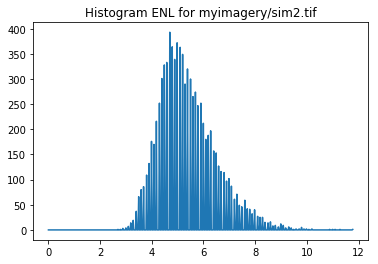

 ENL image written to: myimagery/sim2_enl.tif
elapsed time: 0.771035909653


In [5]:
run scripts/enlml myimagery/sim2.tif

In [26]:
run scripts/sar_seq -s 0.01 myimagery/sim1.tif myimagery/sim2.tif myimagery/sim3.tif \
                            myimagery/sim4.tif myimagery/sim5.tif simout5.tif 5

     Multi-temporal SAR Change Detection
Wed Nov 28 12:36:57 2018
First (reference) filename:  myimagery/sim1.tif
number of images: 5
equivalent number of looks: 5.000000
significance level: 0.010000
pre-calculating Rj and p-values ...
attempting parallel calculation ...
available engines [0, 1]
ell =  1 2 3 4 
elapsed time for p-value calculation: 0.446166992188
last change map written to: /home/mort/python/CRC4Docker/src/myimagery/simout5_cmap.tif
frequency map written to: /home/mort/python/CRC4Docker/src/myimagery/simout5_fmap.tif
bitemporal map image written to: /home/mort/python/CRC4Docker/src/myimagery/simout5_bmap.tif
first change map written to: /home/mort/python/CRC4Docker/src/myimagery/simout5_smap.tif
total elapsed time: 0.451798915863


In [27]:
run scripts/sar_seq -s 0.01  myimagery/sim1.tif myimagery/sim5.tif myimagery/sim3.tif \
myimagery/sim4.tif myimagery/sim2.tif simout2.tif 5

     Multi-temporal SAR Change Detection
Wed Nov 28 12:37:08 2018
First (reference) filename:  myimagery/sim1.tif
number of images: 5
equivalent number of looks: 5.000000
significance level: 0.010000
pre-calculating Rj and p-values ...
attempting parallel calculation ...
available engines [0, 1]
ell =  1 2 3 4 
elapsed time for p-value calculation: 0.188366174698
last change map written to: /home/mort/python/CRC4Docker/src/myimagery/simout2_cmap.tif
frequency map written to: /home/mort/python/CRC4Docker/src/myimagery/simout2_fmap.tif
bitemporal map image written to: /home/mort/python/CRC4Docker/src/myimagery/simout2_bmap.tif
first change map written to: /home/mort/python/CRC4Docker/src/myimagery/simout2_smap.tif
total elapsed time: 0.19606089592


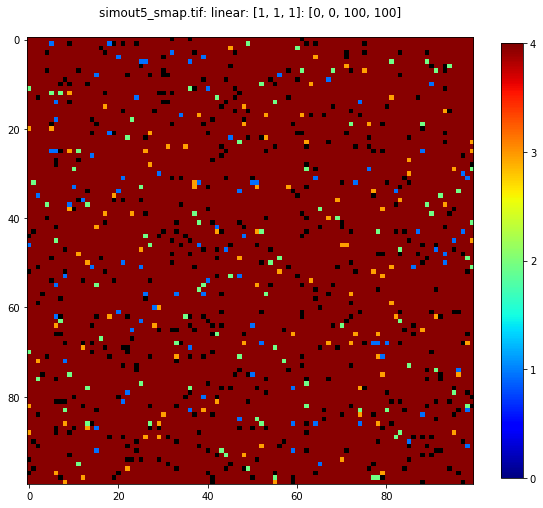

In [29]:
run scripts/dispms -f myimagery/simout5_smap.tif -c

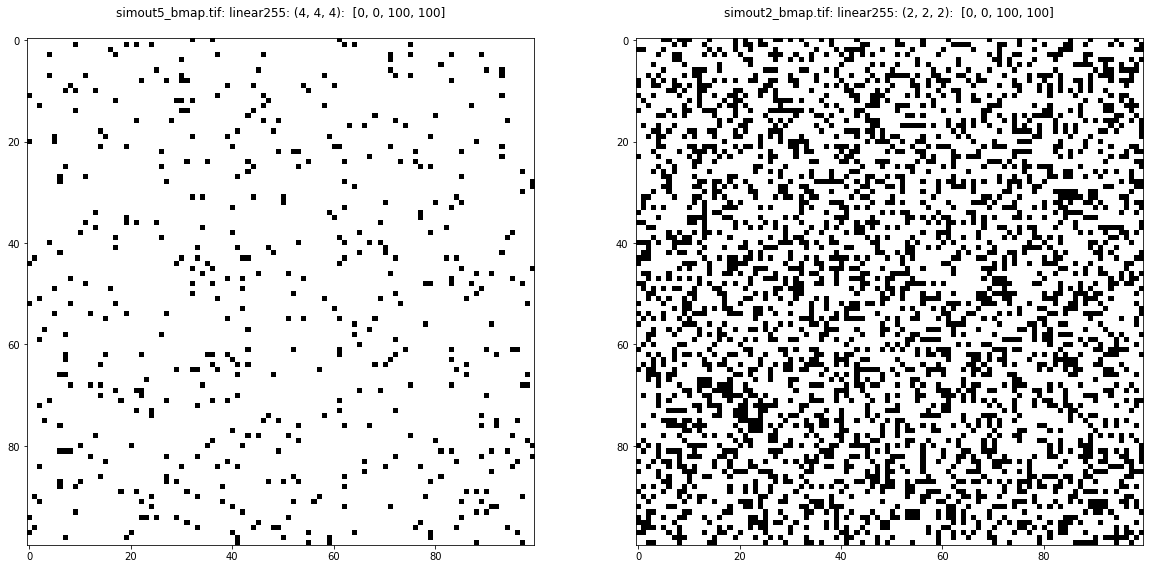

In [28]:
run scripts/dispms -f myimagery/simout5_bmap.tif -e 1 -p [4,4,4] \
                   -F myimagery/simout2_bmap.tif -E 1 -P [2,2,2]